In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import scipy.optimize
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import  LassoLarsIC
from sklearn.preprocessing import KBinsDiscretizer
from copy import  copy
from scipy.stats import t
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import bamt.Networks as Nets
import bamt.Preprocessors as pp

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import MaximumLikelihoodEstimator, BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG
import networkx as nx
import statsmodels.api as sm
from sklearn.metrics import r2_score

from scipy.spatial.distance import jensenshannon
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings(action='ignore')

In [3]:
path_to_file = 'kc_house_data.csv'
source_df = pd.read_csv(path_to_file)

source_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df = source_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors', 'yr_built', 'sqft_above']] 
df = df.head(1000)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_above
0,221900.0,3,1.00,1180,5650,1.0,1955,1180
1,538000.0,3,2.25,2570,7242,2.0,1951,2170
2,180000.0,2,1.00,770,10000,1.0,1933,770
3,604000.0,4,3.00,1960,5000,1.0,1965,1050
4,510000.0,3,2.00,1680,8080,1.0,1987,1680
...,...,...,...,...,...,...,...,...
995,291000.0,4,2.50,1860,6325,2.0,1991,1860
996,199950.0,2,2.75,1590,20917,1.5,1920,1590
997,553500.0,2,1.00,850,2340,1.0,1922,850
998,189950.0,2,1.00,1030,4188,1.0,1981,1030


In [6]:


q75, q25 = np.percentile(df['price'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['price'] < min_dist) | (df['price'] > max_dist), ('price')] = np.nan

q75, q25 = np.percentile(df['bedrooms'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['bedrooms'] < min_dist) | (df['bedrooms'] > max_dist), ('bedrooms')] = np.nan

q75, q25 = np.percentile(df['bathrooms'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['bathrooms'] < min_dist) | (df['bathrooms'] > max_dist), ('bathrooms')] = np.nan

q75, q25 = np.percentile(df['sqft_living'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['sqft_living'] < min_dist) | (df['sqft_living'] > max_dist), ('sqft_living')] = np.nan

q75, q25 = np.percentile(df['sqft_lot'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['sqft_lot'] < min_dist) | (df['sqft_lot'] > max_dist), ('sqft_lot')] = np.nan

q75, q25 = np.percentile(df['floors'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['floors'] < min_dist) | (df['floors'] > max_dist), ('floors')] = np.nan

q75, q25 = np.percentile(df['yr_built'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['yr_built'] < min_dist) | (df['yr_built'] > max_dist), ('yr_built')] = np.nan

q75, q25 = np.percentile(df['sqft_above'], [75, 25])
interval = q75 - q25
min_dist = q25 - (1.5 * interval)
max_dist = q75 + (1.5 * interval)
df.loc[(df['sqft_above'] < min_dist) | (df['sqft_above'] > max_dist), ('sqft_above')] = np.nan

df.dropna(inplace=True)

In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_above
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1955.0,1180.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,1951.0,2170.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,1933.0,770.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,1965.0,1050.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1987.0,1680.0
...,...,...,...,...,...,...,...,...
994,178500.0,2.0,1.00,740.0,6460.0,1.0,1953.0,740.0
995,291000.0,4.0,2.50,1860.0,6325.0,2.0,1991.0,1860.0
997,553500.0,2.0,1.00,850.0,2340.0,1.0,1922.0,850.0
998,189950.0,2.0,1.00,1030.0,4188.0,1.0,1981.0,1030.0


In [8]:
df.corr().price

price          1.000000
bedrooms       0.243493
bathrooms      0.363235
sqft_living    0.568724
sqft_lot      -0.067627
floors         0.265966
yr_built      -0.080446
sqft_above     0.448891
Name: price, dtype: float64

<AxesSubplot:>

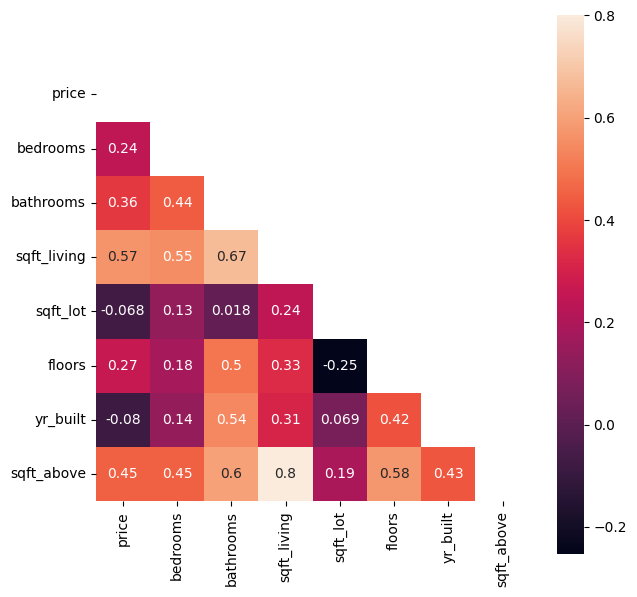

In [9]:
plt.figure(figsize=(7, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True,square=True,mask=matrix)

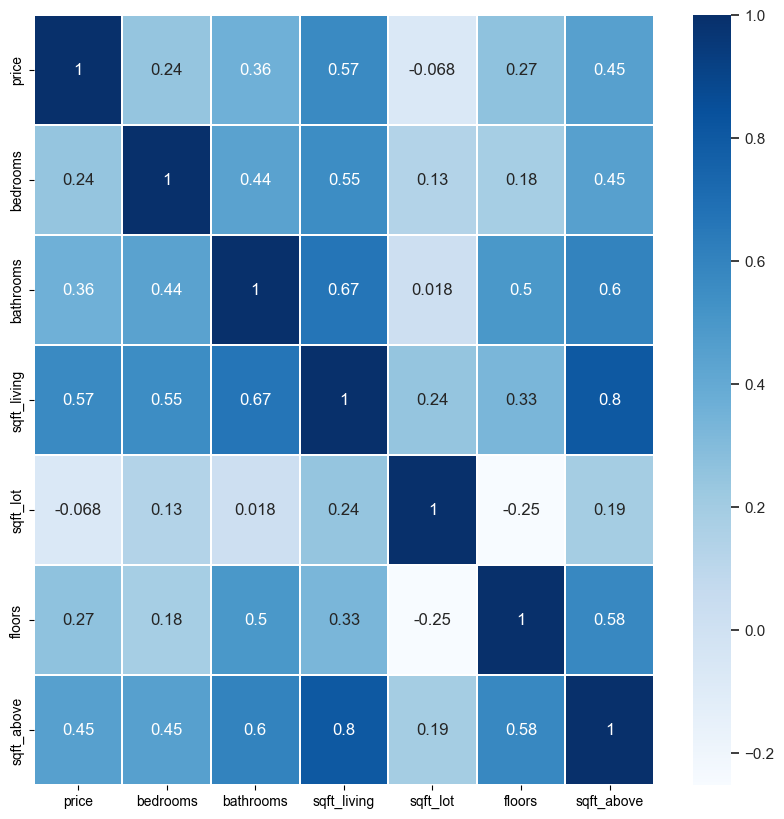

In [10]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(df[['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors',  'sqft_above']].corr(), cmap='Blues', annot=True, linewidths=0.25)

plt.show()

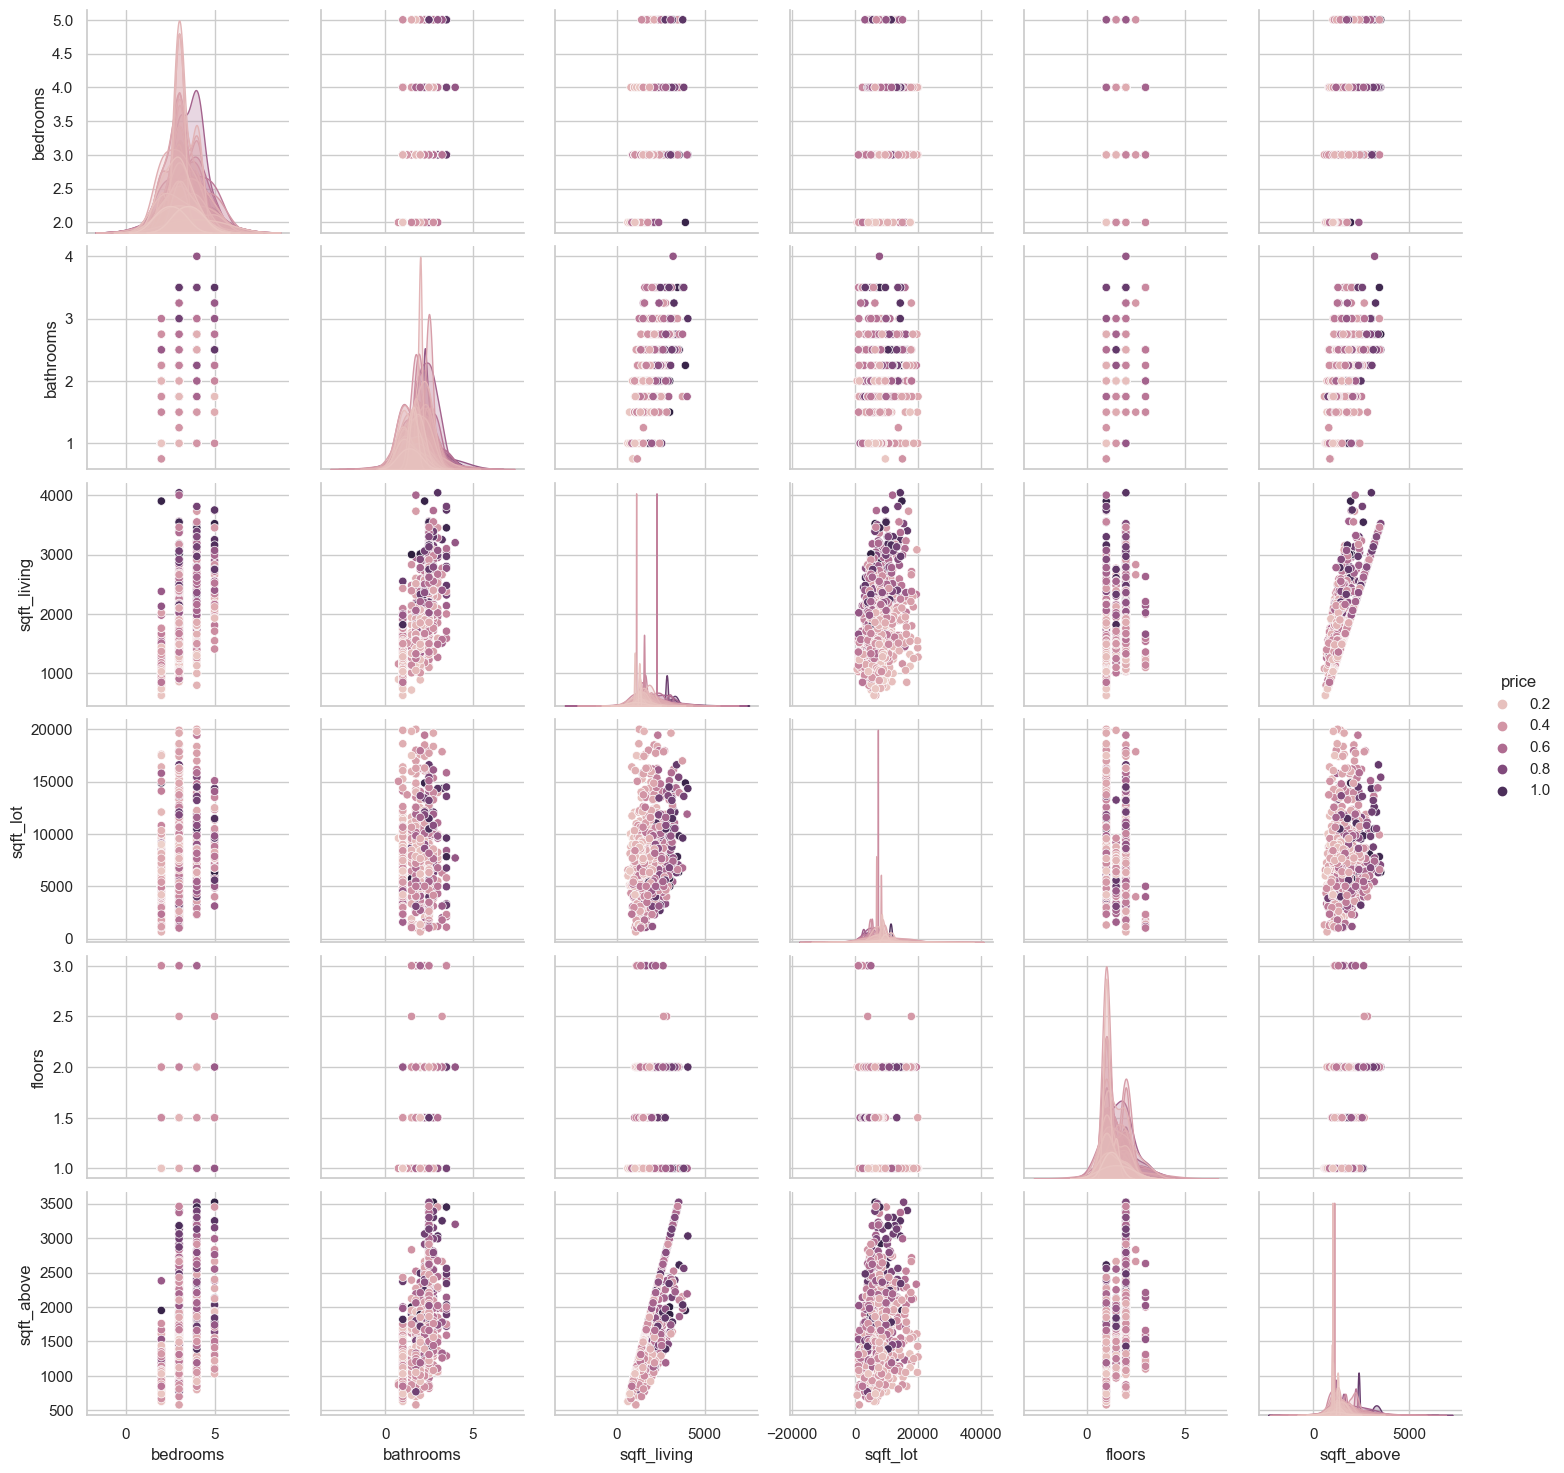

In [11]:
sns.set_theme(style='whitegrid', palette='pastel')

sns.pairplot(df[['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors',  'sqft_above']], hue='price', kind='scatter')

plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors',  'sqft_above']],
    df['price']
)

In [13]:
x_train.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
378,4.0,2.00,2020.0,2849.0,2.0,2020.0
13,3.0,1.75,1370.0,9680.0,1.0,1370.0
526,4.0,2.50,3040.0,6587.0,2.0,3040.0
201,3.0,2.50,1940.0,14952.0,2.0,1940.0
219,2.0,1.50,1320.0,10800.0,1.0,1320.0
855,4.0,2.50,1790.0,6120.0,2.0,1790.0
284,3.0,3.00,2420.0,13959.0,1.0,1740.0
20,4.0,1.75,1620.0,4980.0,1.0,860.0
900,4.0,3.50,2970.0,14486.0,2.0,2340.0
413,3.0,2.50,2000.0,7251.0,2.0,2000.0


In [14]:
y_train.head(10)

378    595000.0
13     400000.0
526    650000.0
201    297000.0
219    467000.0
855    370500.0
284    330000.0
20     385000.0
900    905000.0
413    577500.0
Name: price, dtype: float64

In [76]:
lars = Lars()
lars.fit(x_train, y_train)

print("Train score: ", lars.score(x_train,y_train))
print("Test score: ", lars.score(x_test,y_test))
print(lars.coef_)


Train score:  0.35175791811457147
Test score:  0.43840396076065224
[-2.04135441e+04 -2.56042048e+04  2.17787405e+02 -1.26964543e+01
  1.00086380e+04 -1.46401027e+01]


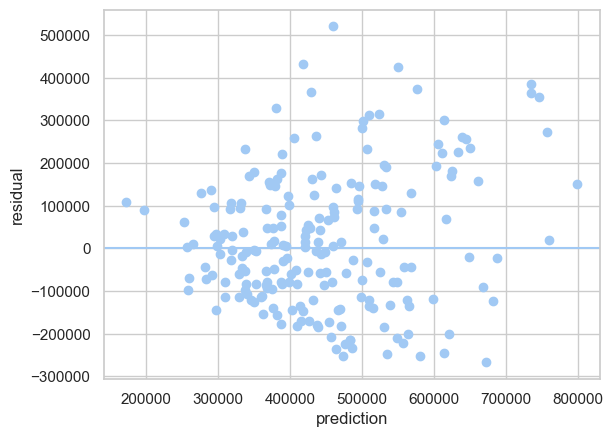

In [82]:
y_pred = lars.predict(x_test)
y_red = y_test - y_pred
plt.scatter(x=y_pred, y=y_red)


plt.ylabel("residual")
plt.xlabel("prediction")

plt.axhline(y=0)

Quantile:  1.6524698419693926
Sigma:  160692.9447774118


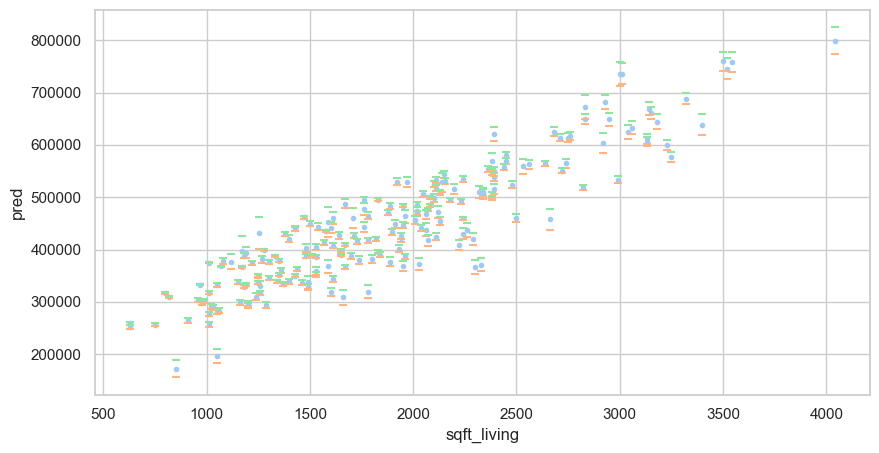

In [78]:
n_params = lars.coef_.shape[0] 
intervals = predict_interval(x_test, n_params, y_test, y_pred)
plt.figure(figsize=(10, 5)) 

plt.xlabel(x_test.iloc[:,2].name)
plt.ylabel("pred")
plt.scatter(x_test.iloc[:,2], y_pred, marker=".")
plt.scatter(x_test.iloc[:,2], intervals.lower,marker="_")
plt.scatter(x_test.iloc[:,2], intervals.upper,marker="_")

In [73]:
lregressor = LinearRegression()
lregressor.fit(x_train, y_train)

print("Train score: ", lregressor.score(x_train,y_train))
print("Test score: ", lregressor.score(x_test,y_test))
print(lregressor.coef_)

Train score:  0.3517579181145716
Test score:  0.43840396076065835
[-2.04135441e+04 -2.56042048e+04  2.17787405e+02 -1.26964543e+01
  1.00086380e+04 -1.46401027e+01]


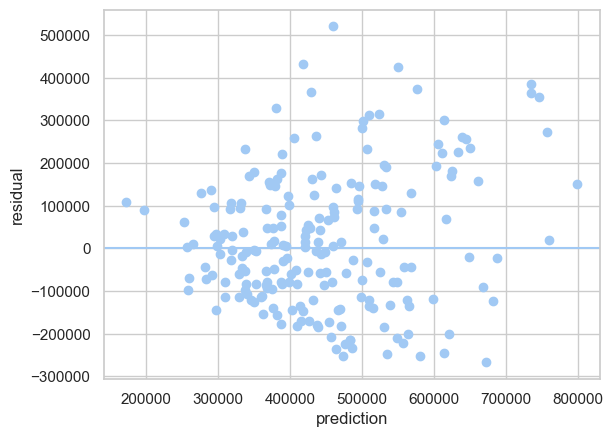

In [74]:
y_pred = lregressor.predict(x_test)
y_red = y_test - y_pred
plt.scatter(x=y_pred, y=y_red)

plt.ylabel("residual")
plt.xlabel("prediction")

plt.axhline(y=0)

Quantile:  1.6524698419693926
Sigma:  160692.94477741088


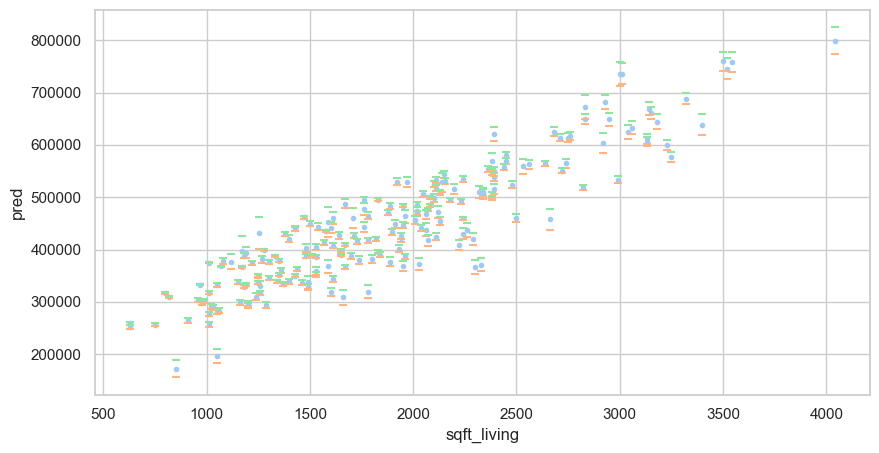

In [75]:
n_params = lregressor.coef_.shape[0] 
intervals = predict_interval(x_test, n_params, y_test, y_pred)
plt.figure(figsize=(10, 5)) 

plt.xlabel(x_test.iloc[:,2].name)
plt.ylabel("pred")
plt.scatter(x_test.iloc[:,2], y_pred, marker=".")
plt.scatter(x_test.iloc[:,2], intervals.lower,marker="_")
plt.scatter(x_test.iloc[:,2], intervals.upper,marker="_")

In [70]:
elastic = ElasticNet()
elastic.fit(x_train, y_train)

print("Train score: ", elastic.score(x_train,y_train))
print("Test score: ", elastic.score(x_test,y_test))
print(elastic.coef_)

Train score:  0.3485857662564895
Test score:  0.4286427112806346
[-9765.7372123  -7206.23370165   199.02772439   -12.73451846
   482.17441504   -11.96851995]


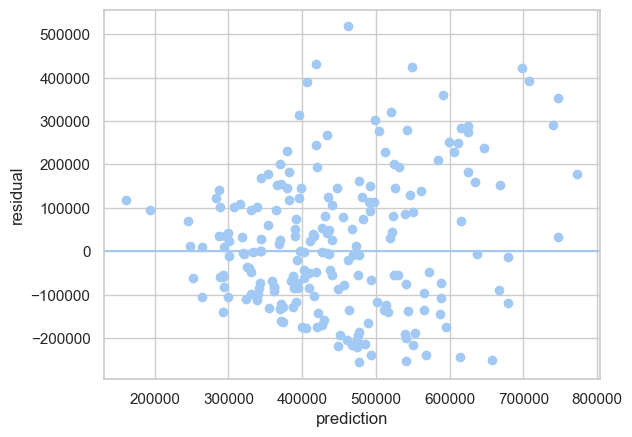

In [71]:
y_pred = elastic.predict(x_test)
y_red = y_test - y_pred
plt.scatter(x=y_pred, y=y_red)

plt.ylabel("residual")
plt.xlabel("prediction")

plt.axhline(y=0)

Quantile:  1.6524698419693926
Sigma:  162083.45192763352


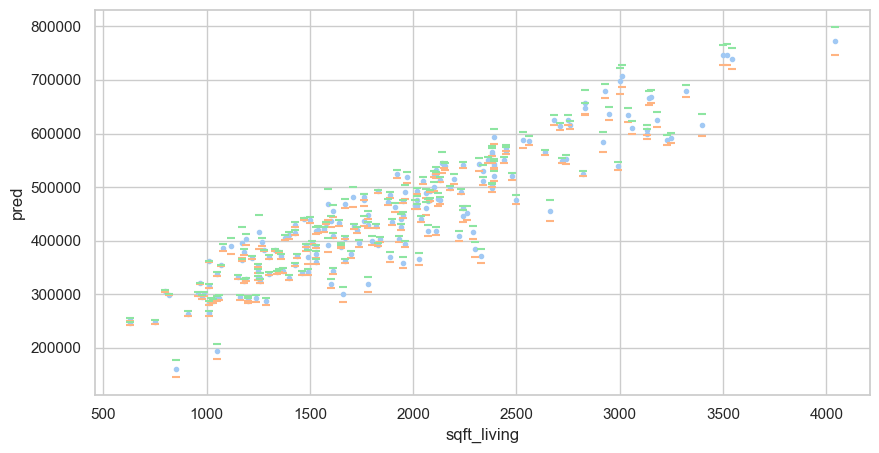

In [72]:
n_params = elastic.coef_.shape[0] 
intervals = predict_interval(x_test, n_params, y_test, y_pred)
plt.figure(figsize=(10, 5)) 

plt.xlabel(x_test.iloc[:,2].name)
plt.ylabel("pred")
plt.scatter(x_test.iloc[:,2], y_pred, marker=".")
plt.scatter(x_test.iloc[:,2], intervals.lower,marker="_")
plt.scatter(x_test.iloc[:,2], intervals.upper,marker="_")

In [20]:
def predict_interval(X,var_n, y_test, y_pred, alpha=0.1, model = 'linear'):
    # var_n - количество параметров модели
    N = len(X)
    # Quantile of Student's t distribution for p=(1-alpha/2)
    
    q = t.ppf(1.0 - alpha / 2.0, N - var_n)
    print("Quantile: ", q)
    sigma =0
    if model == 'linear':
        sigma = np.sqrt(sum((y_test.values - y_pred)**2)/(N - var_n))  
    else:

        sigma = np.sqrt(sum((y_test - y_pred)**2)/(N - var_n))
    print("Sigma: ", sigma)

    ddd = pd.DataFrame(y_pred,columns=['prediction'])
    iter = 0

    for xb in y_pred:

        x = X.iloc[iter,:].values
        inv_1 = np.matmul(X.transpose(), X)
        inv_1 = np.linalg.inv(inv_1)
        inv_2 = x.transpose()
        root = np.matmul(x,inv_1)
        root = np.matmul(root,inv_2)
        ddd.loc[iter, 'lower'] = xb - q * sigma * root
        ddd.loc[iter, 'upper'] = xb + q * sigma * root
        iter+=1
    
    return ddd

## BS

In [24]:
transformed_data = copy(df)

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(transformed_data.values)
transformed_data[['price','bedrooms','bathrooms','sqft_living','sqft_lot', 'floors', 'yr_built', 'sqft_above']] = data_discrete

In [25]:
transformed_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,sqft_above
0,0.0,1.0,0.0,1.0,2.0,0.0,4.0,2.0
1,4.0,1.0,4.0,6.0,3.0,3.0,4.0,5.0
2,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0
3,4.0,3.0,6.0,4.0,2.0,0.0,5.0,1.0
4,4.0,1.0,3.0,3.0,3.0,0.0,7.0,4.0


In [29]:

from sklearn.preprocessing import PolynomialFeatures
poly_featch = PolynomialFeatures(degree=3)
df_poly = poly_featch.fit_transform(df)

In [30]:
transformed_data_poly = copy(pd.DataFrame(df_poly))
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

data_discrete = est.fit_transform(transformed_data_poly)
transformed_data_poly = data_discrete

In [31]:
hc = HillClimbSearch(transformed_data, {"scoring_method": BicScore(transformed_data)})

In [32]:
best_model = hc.estimate()

  0%|          | 0/1000000 [00:00<?, ?it/s]

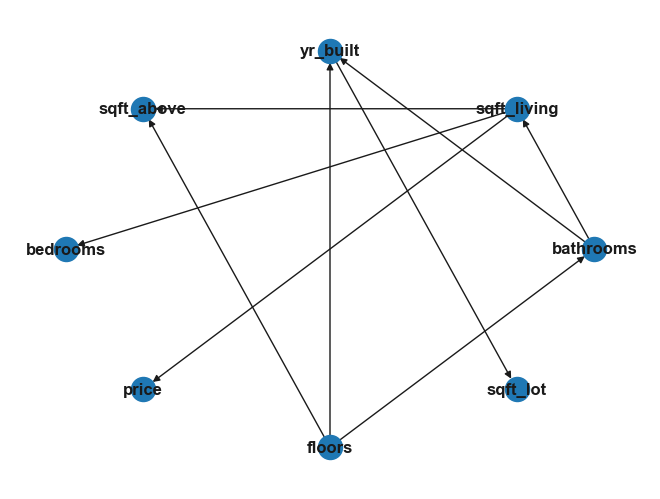

In [33]:
G_BIC = nx.DiGraph()
G_BIC.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_BIC)
nx.draw(G_BIC, pos, with_labels=True,font_weight='bold')

In [34]:
bdeu = BDeuScore(transformed_data, equivalent_sample_size=5)
k2 = K2Score(transformed_data)
bic = BicScore(transformed_data)

In [35]:
print(f'BDeu: {bdeu.score(best_model)}')
print(f'K2: {k2.score(best_model)}')
print(f'BIC: {bic.score(best_model)}')

BDeu: -10924.764598469845
K2: -10464.449328170156
BIC: -13467.612078109914


  0%|          | 0/1000000 [00:00<?, ?it/s]

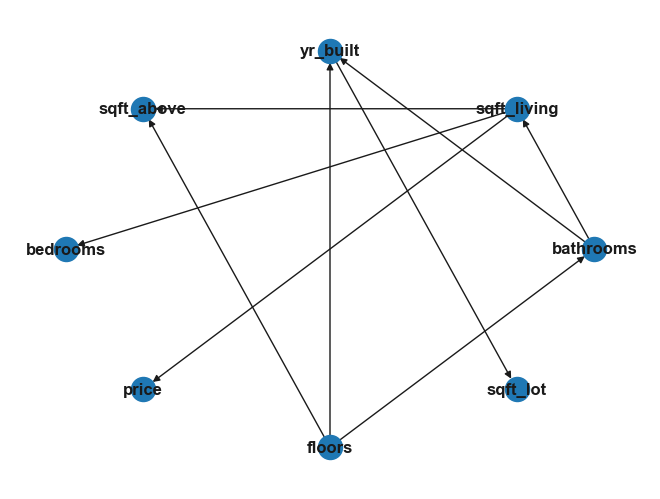

In [36]:
bdu = HillClimbSearch(transformed_data, {"scoring_method": BDeuScore(transformed_data)})
best_model_bdu = bdu.estimate()
G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model_bdu.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True,font_weight='bold')

In [37]:
print(f'BDeu: {bdeu.score(best_model_bdu)}')
print(f'K2: {k2.score(best_model_bdu)}')
print(f'BIC: {bic.score(best_model_bdu)}')

BDeu: -10924.764598469845
K2: -10464.449328170156
BIC: -13467.612078109914


In [38]:
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling

bn_new = BayesianModel(best_model.edges())
bn_new.fit(transformed_data)

In [39]:
bn_new.check_model()

True

In [40]:
best_model.edges()

OutEdgeView([('bathrooms', 'sqft_living'), ('bathrooms', 'yr_built'), ('sqft_living', 'sqft_above'), ('sqft_living', 'bedrooms'), ('sqft_living', 'price'), ('floors', 'yr_built'), ('floors', 'bathrooms'), ('floors', 'sqft_above'), ('yr_built', 'sqft_lot')])

In [47]:
train_data = transformed_data[:400]
predict_data = transformed_data[400:]

model = BayesianModel(best_model.edges())
model.fit(transformed_data)

predict_data2 = predict_data.copy()
predict_data2.drop('price', axis=1, inplace=True)

y_pred = model.predict(predict_data2)
r2_score(predict_data.price,y_pred)

  0%|          | 0/381 [00:00<?, ?it/s]

-0.47495996057656753

In [48]:
train_data = transformed_data[:400]
predict_data = transformed_data[400:]

model = BayesianModel(best_model_bdu.edges())
model.fit(transformed_data)

predict_data2 = predict_data.copy()
predict_data2.drop('price', axis=1, inplace=True)
print(predict_data2)
y_pred = model.predict(predict_data2)
y_pred

     bedrooms  bathrooms  sqft_living  sqft_lot  floors  yr_built  sqft_above
490       3.0        2.0          2.0       3.0     0.0       5.0         1.0
491       1.0        3.0          3.0       2.0     0.0       7.0         4.0
492       1.0        3.0          1.0       5.0     0.0       5.0         2.0
493       4.0        5.0          6.0       6.0     3.0       5.0         6.0
494       1.0        3.0          2.0       3.0     0.0       6.0         1.0
..        ...        ...          ...       ...     ...       ...         ...
994       0.0        0.0          0.0       3.0     0.0       4.0         0.0
995       3.0        5.0          3.0       2.0     3.0       7.0         4.0
997       0.0        0.0          0.0       0.0     0.0       1.0         0.0
998       0.0        0.0          0.0       1.0     0.0       6.0         1.0
999       1.0        3.0          3.0       4.0     0.0       7.0         4.0

[425 rows x 7 columns]


  0%|          | 0/381 [00:00<?, ?it/s]

,price
0,0.0
1,1.0
2,0.0
3,5.0
4,0.0
...,...
420,0.0
421,1.0
422,0.0
423,0.0


In [46]:
r2_score(predict_data.price,y_pred)

-0.47495996057656753

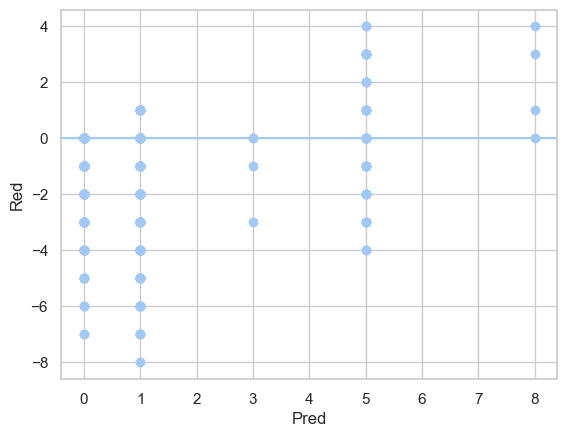

In [50]:
y_pred =  np.array(y_pred).ravel()
y_true = predict_data.price.values
y_red = y_pred-y_true
plt.scatter(x=y_pred, y=y_red)
plt.ylabel("Red")
plt.xlabel("Pred")
plt.axhline(y=0)

In [51]:
n_params = 2

intervals = predict_interval(predict_data2, n_params, y_true, y_pred,model='l')

Quantile:  1.6484638683249322
Sigma:  2.5806151336619543


Text(0.5, 0, 'bedrooms')

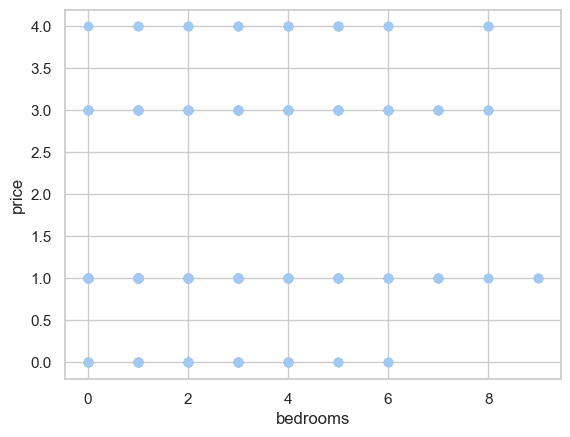

In [53]:
plt.scatter(predict_data.price,predict_data.bedrooms)
plt.ylabel('price')
plt.xlabel('bedrooms')

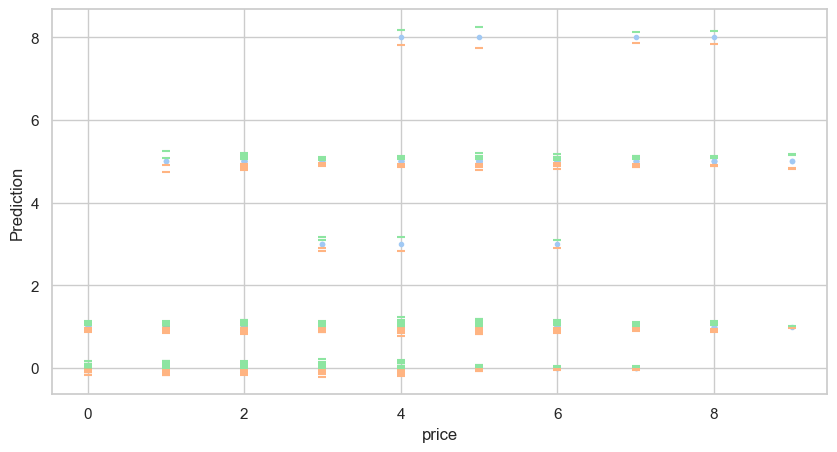

In [54]:
plt.figure(figsize=(10, 5)) 
plt.ylabel("Prediction")
plt.xlabel(predict_data.iloc[:,0].name)
plt.scatter(predict_data.iloc[:,0], y_pred, marker=".")
plt.scatter(predict_data.iloc[:,0], intervals.lower,marker="_")
plt.scatter(predict_data.iloc[:,0], intervals.upper,marker="_")

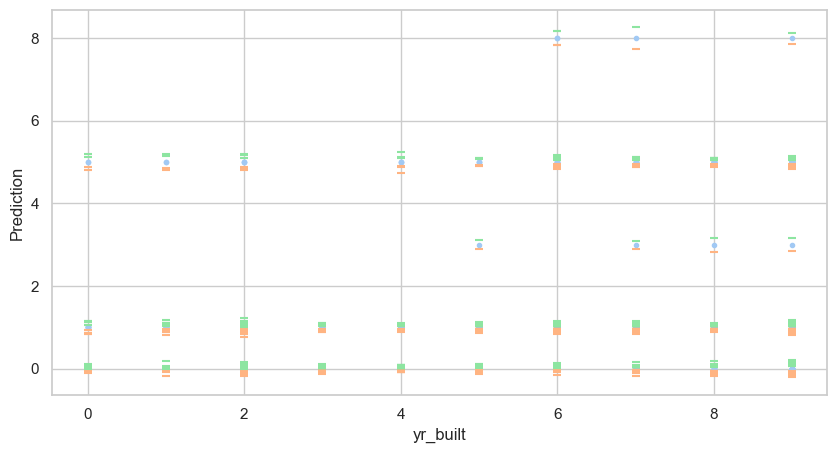

In [55]:
plt.figure(figsize=(10, 5)) 
plt.ylabel("Prediction")
plt.xlabel(predict_data.iloc[:,-2].name)
plt.scatter(predict_data.iloc[:,-2], y_pred, marker=".")
plt.scatter(predict_data.iloc[:,-2], intervals.lower,marker="_")
plt.scatter(predict_data.iloc[:,-2], intervals.upper,marker="_")

Text(0.5, 0, 'bathrooms')

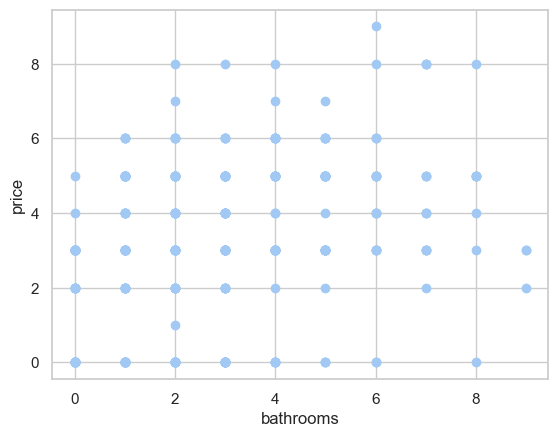

In [58]:
plt.scatter(predict_data.price,predict_data.bathrooms)
plt.ylabel('price')
plt.xlabel('bathrooms')

In [84]:
hc_search = HillClimbSearch(data=transformed_data)
hc_k2 = hc_search.estimate(scoring_method=K2Score(transformed_data))
hc_bic = hc_search.estimate(scoring_method=BicScore(transformed_data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

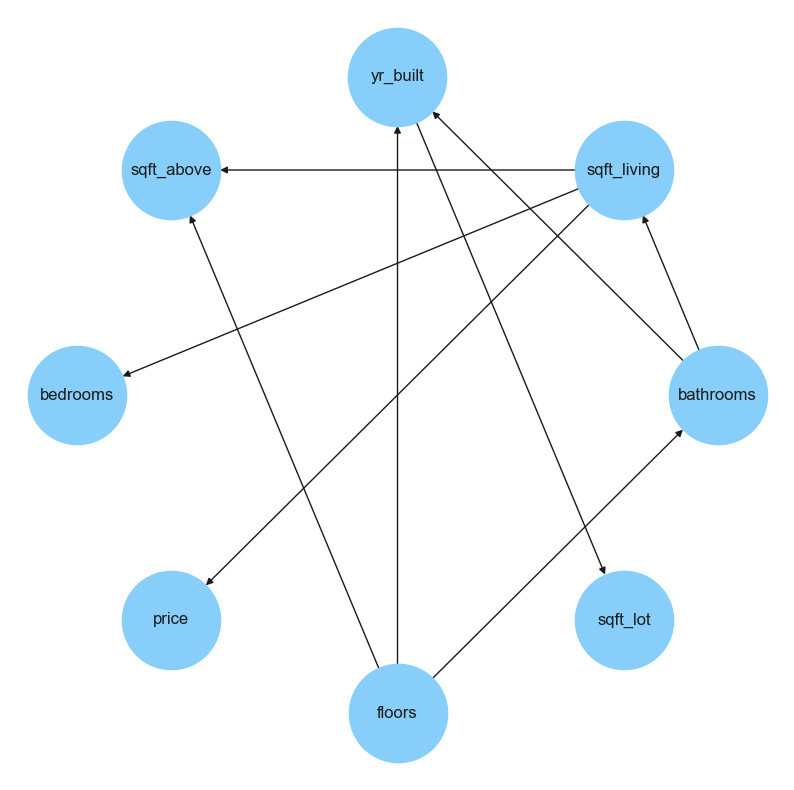

In [85]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_k2.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

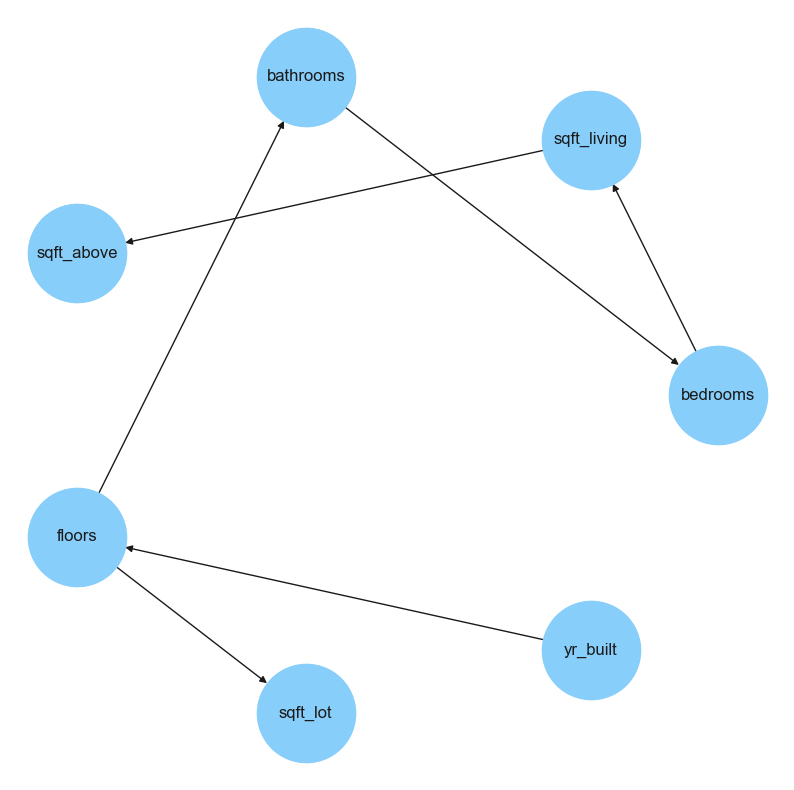

In [86]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_bic.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [108]:
edges_list = [
    ('bathrooms', 'floors'),
    ('sqft_lot', 'yr_built'),
    ('bedrooms', 'sqft_living'),
    ('sqft_above', 'sqft_living'),
    ('bathrooms', 'sqft_lot'),
    ('sqft_lot', 'sqft_living'),
        ('price', 'sqft_living')
]

our_model = BayesianModel(edges_list)

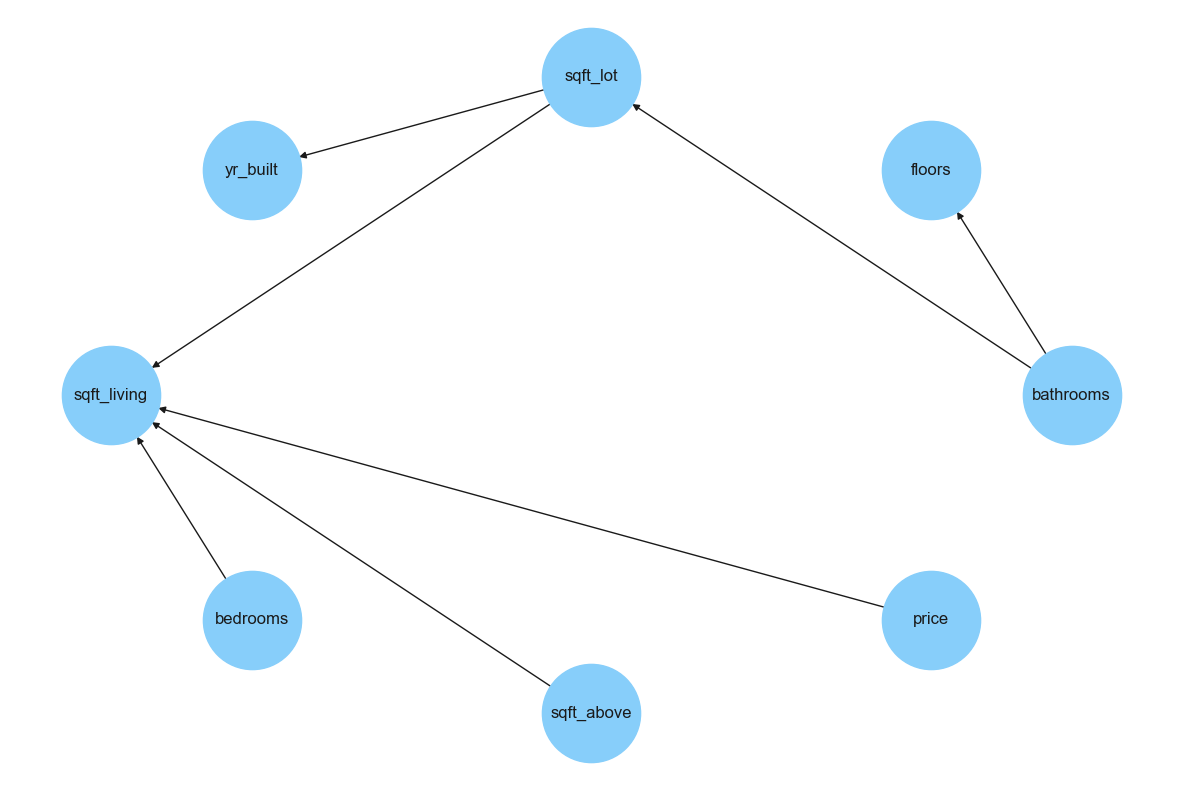

In [109]:
figure, ax = plt.subplots(1, 1, figsize=(15, 10))

graph = nx.DiGraph()
graph.add_edges_from(our_model.edges())

positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [95]:
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore
e_search = TreeSearch(data=transformed_data)
e_model = e_search.estimate()

Building tree:   0%|          | 0/28.0 [00:00<?, ?it/s]

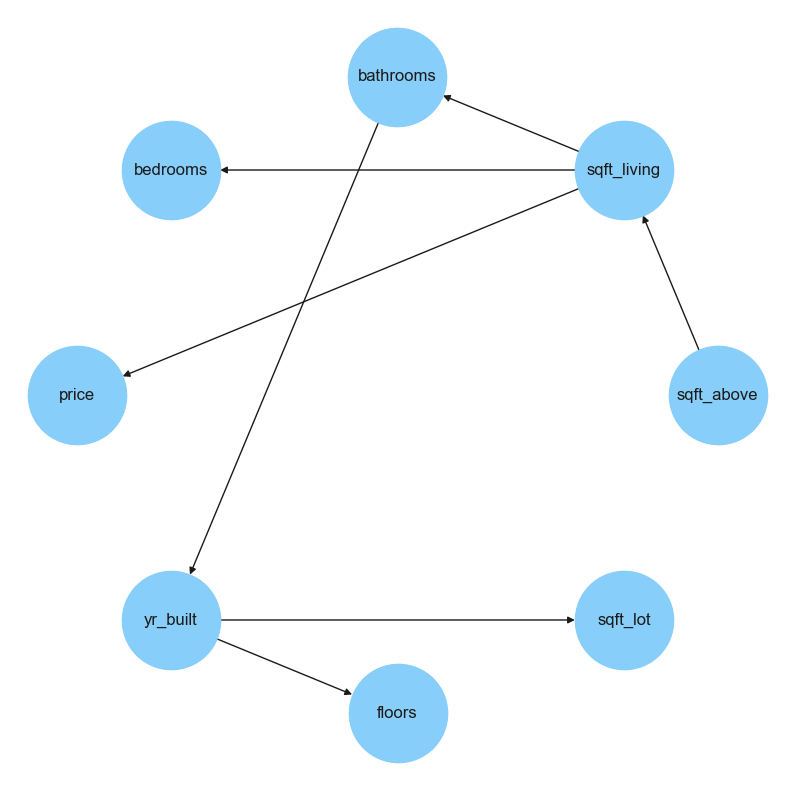

In [96]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(e_model.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [97]:
def return_sample(model, data, size):
    model_s = BayesianModel(model.edges())
    model_s.fit(data)
    
    sampling = BayesianModelSampling(model_s)
    sample = sampling.forward_sample(size=size)
    return sample

In [110]:
sample_hc = return_sample(hc_k2, transformed_data, transformed_data.shape[0])
sample_e = return_sample(e_model, transformed_data, transformed_data.shape[0])
sample_our = return_sample(our_model, transformed_data, transformed_data.shape[0])

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [104]:

from sklearn.metrics import classification_report
print(classification_report(transformed_data.price, sample_hc.price))

              precision    recall  f1-score   support

         0.0       0.21      0.22      0.22       129
         1.0       0.19      0.19      0.19       166
         2.0       0.15      0.14      0.14       125
         3.0       0.16      0.19      0.17       134
         4.0       0.10      0.10      0.10       104
         5.0       0.06      0.05      0.06        73
         6.0       0.05      0.05      0.05        39
         7.0       0.07      0.07      0.07        29
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00         8

    accuracy                           0.15       825
   macro avg       0.10      0.10      0.10       825
weighted avg       0.14      0.15      0.14       825



In [106]:
print(classification_report(transformed_data.price, sample_e.price))

              precision    recall  f1-score   support

         0.0       0.11      0.11      0.11       129
         1.0       0.20      0.22      0.21       166
         2.0       0.18      0.18      0.18       125
         3.0       0.18      0.19      0.18       134
         4.0       0.14      0.13      0.14       104
         5.0       0.05      0.04      0.05        73
         6.0       0.02      0.03      0.02        39
         7.0       0.04      0.03      0.04        29
         8.0       0.06      0.06      0.06        18
         9.0       0.00      0.00      0.00         8

    accuracy                           0.14       825
   macro avg       0.10      0.10      0.10       825
weighted avg       0.14      0.14      0.14       825



In [111]:
print(classification_report(transformed_data.price, sample_our.price))

              precision    recall  f1-score   support

         0.0       0.16      0.15      0.15       129
         1.0       0.18      0.19      0.19       166
         2.0       0.15      0.15      0.15       125
         3.0       0.17      0.17      0.17       134
         4.0       0.13      0.12      0.12       104
         5.0       0.09      0.08      0.08        73
         6.0       0.02      0.03      0.02        39
         7.0       0.07      0.07      0.07        29
         8.0       0.00      0.00      0.00        18
         9.0       0.00      0.00      0.00         8

    accuracy                           0.14       825
   macro avg       0.10      0.10      0.10       825
weighted avg       0.14      0.14      0.14       825



In [115]:
def return_histplot(target, data, sample_1, sample_2, sample_3):
    df_1 = pd.DataFrame()
    df_1[target] = data[target]
    df_1['Data'] = 'Data'
    df_1['Probability'] = df_1[target].apply(lambda x: (df_1.groupby(target)[target].count()[x])/data.shape[0])
    
    df_2 = pd.DataFrame()
    df_2[target] = sample_1[target]
    df_2['Data'] = 'HillClimbSearch'
    df_2['Probability'] = df_2[target].apply(lambda x: (df_2.groupby(target)[target].count()[x])/sample_1.shape[0])
    
    df_3 = pd.DataFrame()
    df_3[target] = sample_2[target]
    df_3['Data'] = 'TreeSearch'
    df_3['Probability'] = df_3[target].apply(lambda x: (df_3.groupby(target)[target].count()[x])/sample_2.shape[0])
    
    df_4 = pd.DataFrame()
    df_4[target] = sample_3[target]
    df_4['Data'] = 'my'
    df_4['Probability'] = df_4[target].apply(lambda x: (df_4.groupby(target)[target].count()[x])/sample_3.shape[0])
    
    df = pd.DataFrame()
    df = pd.concat([df_1, df_2, df_3, df_4])
    
    figure, ax = plt.subplots(1, 1, figsize=(10, 10))
   
    
    sns.barplot(x=target, y='Probability', hue='Data', data=df, palette='Blues')
    
    plt.legend()
    plt.show()

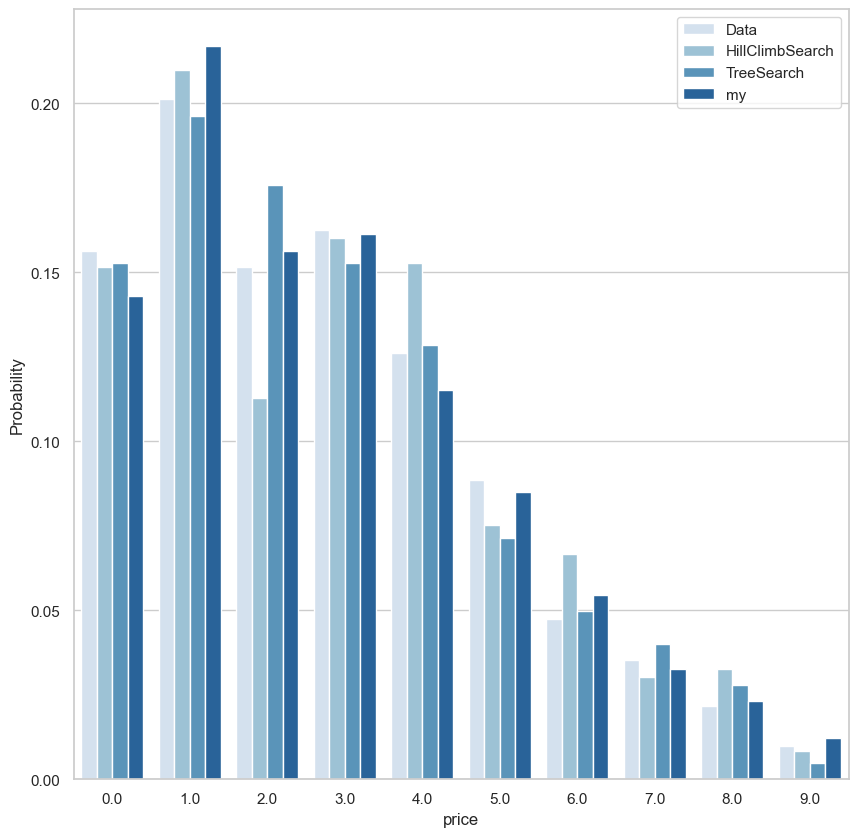

In [116]:
return_histplot(
    'price',
    transformed_data,
    sample_hc,
    sample_e,
    sample_our
)